In [46]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf

file_path = '/Users/shebinsam/Desktop/cogs/cogs-164/Fear of Failure–Survey (COGS 164) (Responses) - Form Responses 1.csv'

df = pd.read_csv(file_path)

df.head(8)

,Timestamp,Rate FF,Goals anxiety,FF-High Stakes,FF-Future plans,Self-Value,Outcome Control,FoF Total,Rate AM,Intrinsic Motivation,...,"Learning Content 1st Priority if FF for P/NP Class, GPA N/A",Would Seek Help Due to FF,Would Persist if FF,Actively Seek Feedback,Perception of Academia if Failure Not Possible,Motivation to Learn Master Course Content if Failure Not Possible,Relationship Between Grades & Learning,Define Academic Success,How High Potential for Failure Affects Personal Interest,How High Stakes Class Affects Priorities
0,3/6/2024 20:19:19,1,2,2,1,1,2,30.000000,4,4,...,3.0,3,4,3,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
1,2/29/2024 19:03:31,3,2,4,2,2,4,56.666667,4,3,...,3.0,4,5,3,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
2,3/2/2024 15:45:12,4,4,4,4,4,4,80.000000,3,3,...,3.0,3,3,3,I would not be willing to take risks and explo...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Learning would be my top priority.
3,3/2/2024 21:44:03,5,5,5,5,3,5,93.333333,5,4,...,4.0,5,5,5,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Learning would be my top priority.
4,3/6/2024 13:28:41,4,4,4,5,4,3,80.000000,5,4,...,2.0,4,4,3,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Getting a good grade/ passing the class would ...
5,2/29/2024 11:00:41,4,5,3,1,4,3,66.666667,4,4,...,5.0,2,4,4,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
6,2/29/2024 18:48:28,5,3,3,5,4,4,80.000000,3,4,...,4.0,3,4,4,I would not be willing to take risks and explo...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
7,2/29/2024 23:47:48,5,5,5,5,5,5,100.000000,5,5,...,4.0,4,3,3,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Learning would be my top priority.


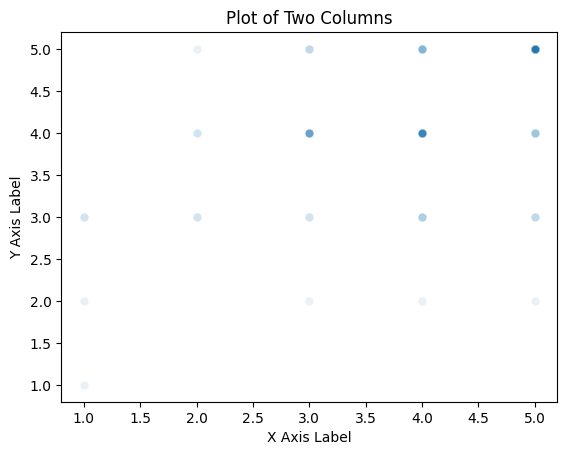

In [35]:
sns.scatterplot(data=df,x='Rate FF', y='Goals anxiety',alpha=0.1)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Plot of Two Columns')
plt.show()

In [36]:
fof = df[["Rate FF","Goals anxiety","FF-High Stakes","FF-Future plans","Self-Value","Outcome Control"]].sum()
fof_total = df["Rate FF"]+ df["Goals anxiety"]+df["FF-High Stakes"] + df["FF-Future plans"] + df["Self-Value"] + df["Outcome Control"]
fof_total = fof_total/30
fof_total = fof_total*100


mot_total = df["Rate AM"]+ df["Intrinsic Motivation"]+df["Seeking Learning Opportunity"] + df["Enthusiasm in Challenges"] + df["Self Comparison"] + df["Score Comparison"]
mot_total =mot_total/30
mot_total = mot_total*100

df_col_merged = pd.concat([fof_total, mot_total], axis=1)


In [37]:
print(df_col_merged)

            0          1
0   30.000000  70.000000
1   56.666667  76.666667
2   80.000000  60.000000
3   93.333333  83.333333
4   80.000000  76.666667
..        ...        ...
92  86.666667  76.666667
93  80.000000  86.666667
94  76.666667  76.666667
95  80.000000  86.666667
96  70.000000  63.333333

[97 rows x 2 columns]


In [38]:
df_col_merged.rename(columns={0:"col1", 1:"col2"})

,col1,col2
0,30.000000,70.000000
1,56.666667,76.666667
2,80.000000,60.000000
3,93.333333,83.333333
4,80.000000,76.666667
...,...,...
92,86.666667,76.666667
93,80.000000,86.666667
94,76.666667,76.666667
95,80.000000,86.666667


<function matplotlib.pyplot.show(close=None, block=None)>

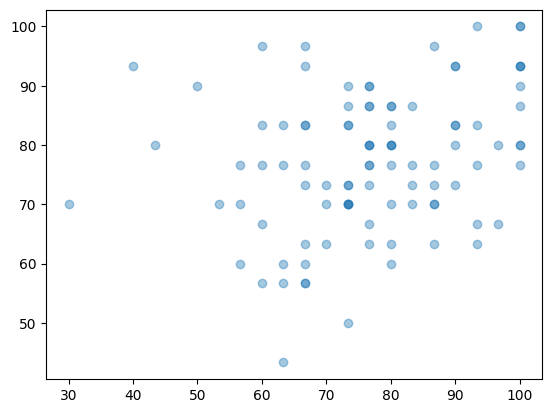

In [39]:
plt.scatter(fof_total,mot_total,alpha = 0.4)
plt.show

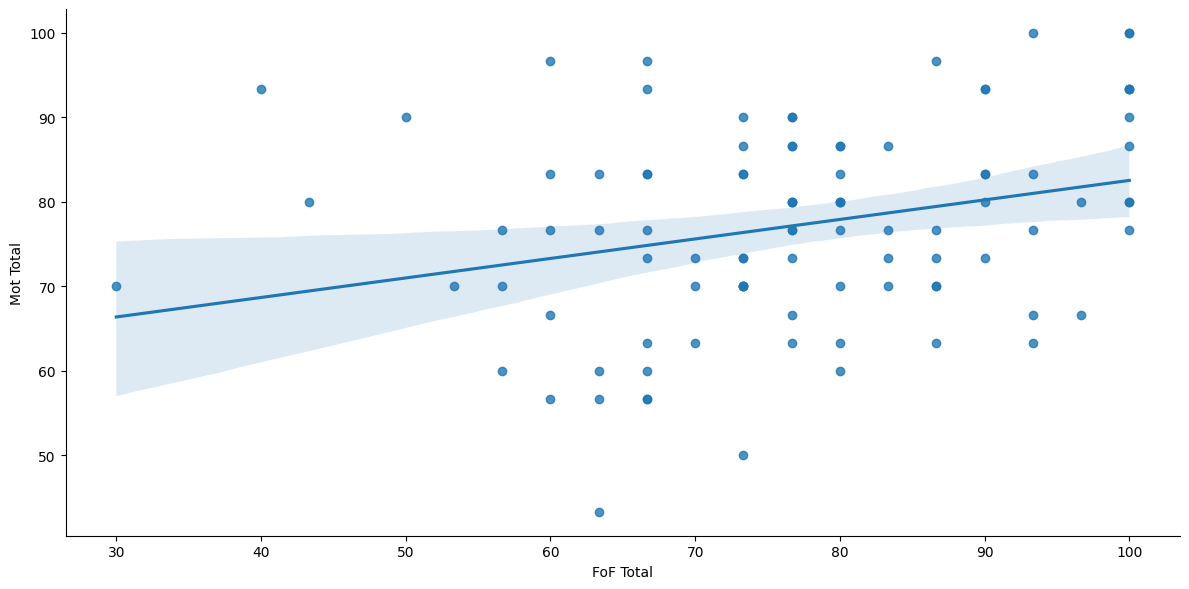

In [40]:
sns.lmplot(x='FoF Total', y='Mot Total', data=df, fit_reg=True, height=6, aspect=2);

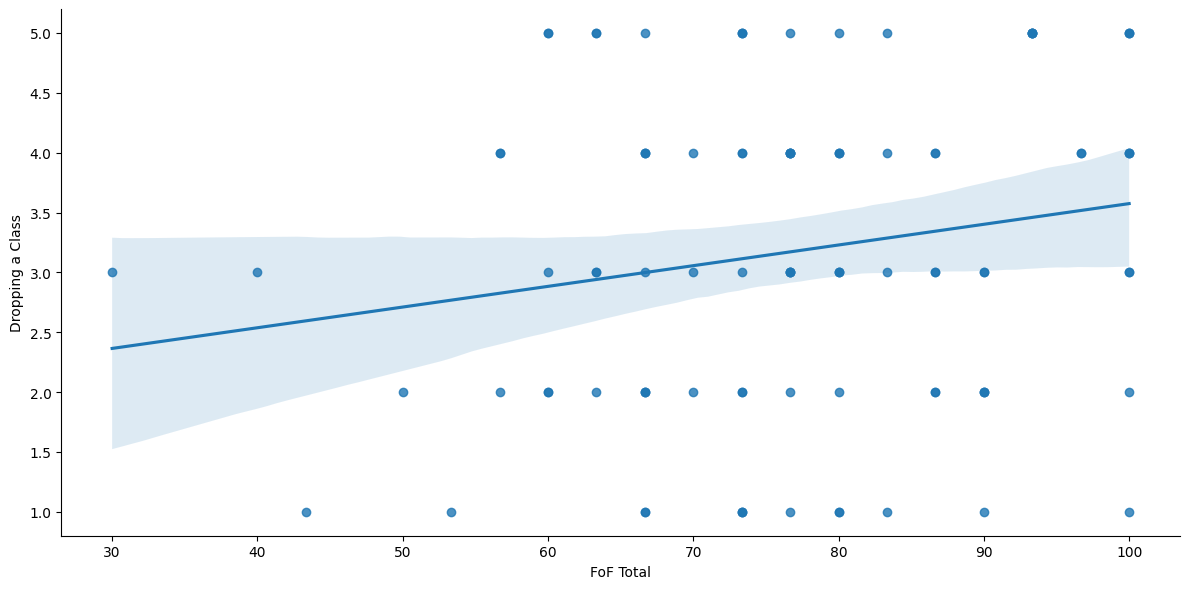

In [41]:
sns.lmplot(x='FoF Total', y='Dropping a Class', data=df, fit_reg=True, height=6, aspect=2);

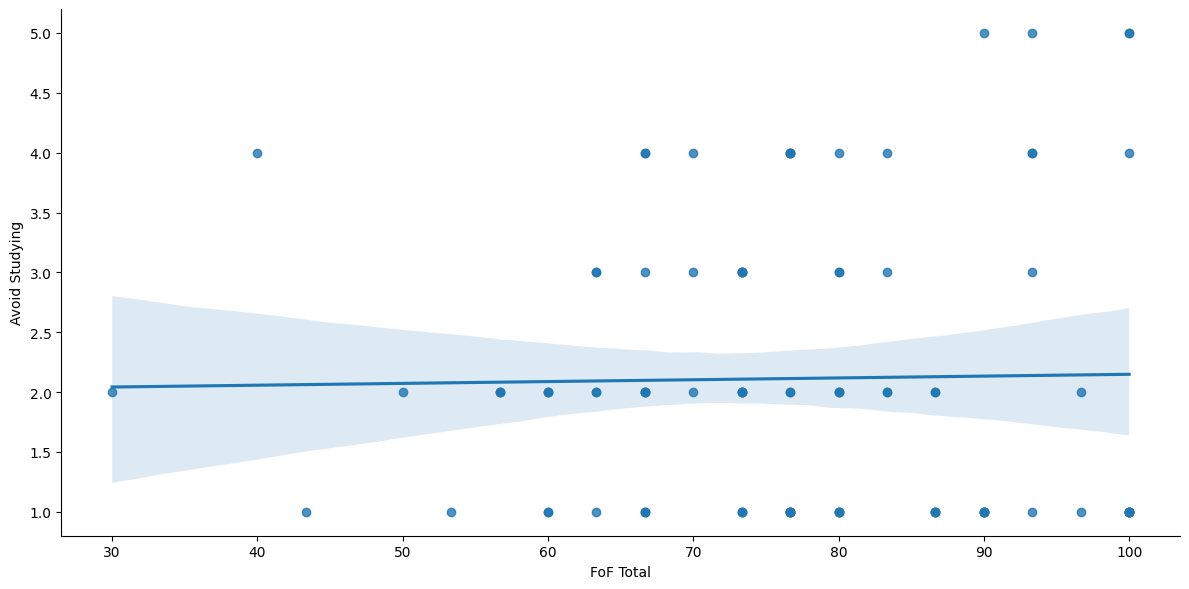

In [42]:
sns.lmplot(x='FoF Total', y='Avoid Studying', data=df, fit_reg=True, height=6, aspect=2);

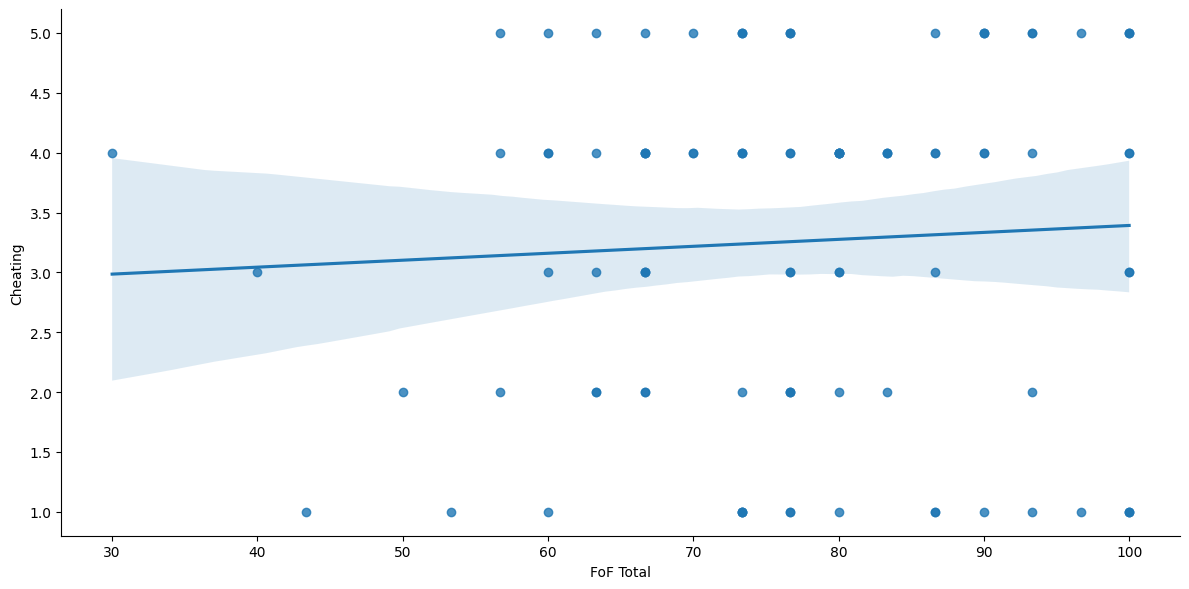

In [11]:
sns.lmplot(x='FoF Total', y='Cheating', data=df, fit_reg=True, height=6, aspect=2);

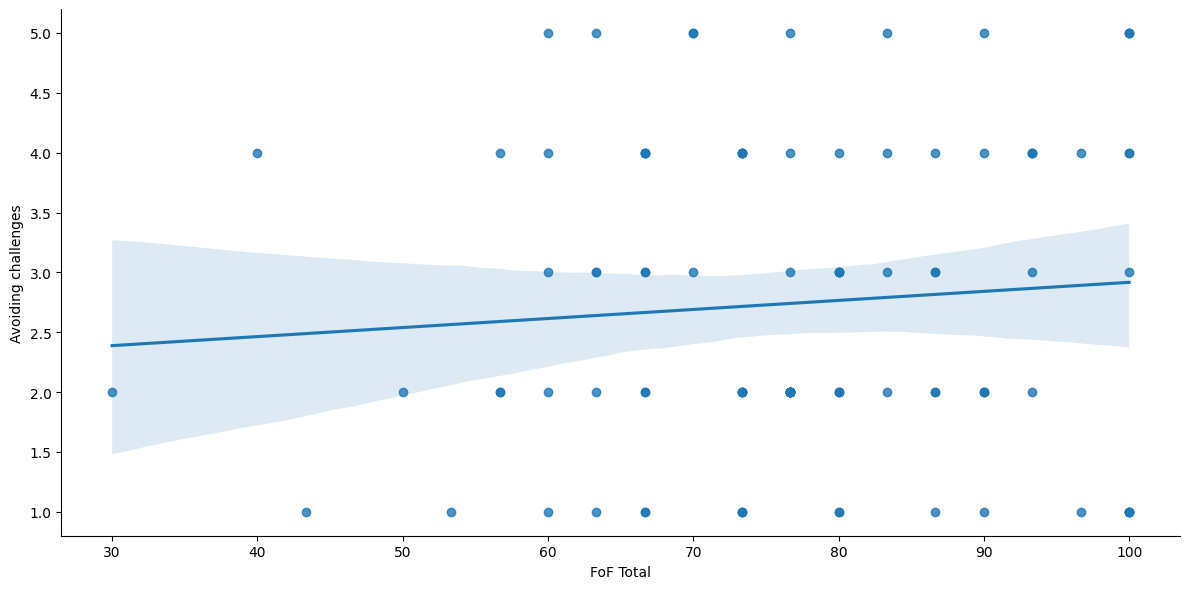

In [12]:
sns.lmplot(x='FoF Total', y='Avoiding challenges', data=df, fit_reg=True, height=6, aspect=2);

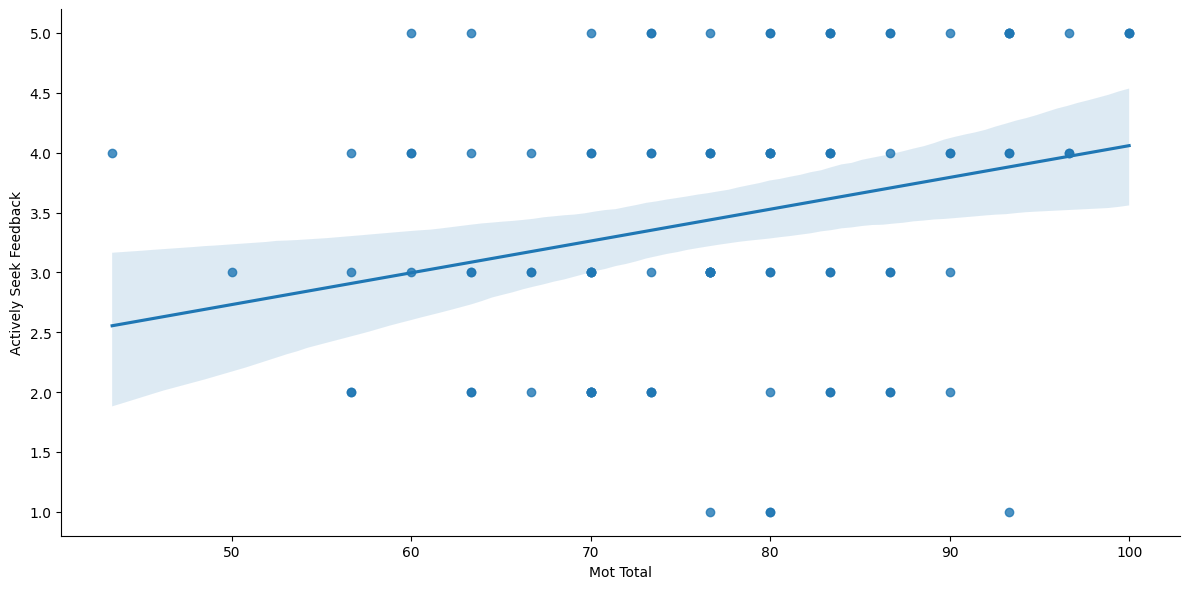

In [13]:
sns.lmplot(x='Mot Total', y='Actively Seek Feedback', data=df, fit_reg=True, height=6, aspect=2);

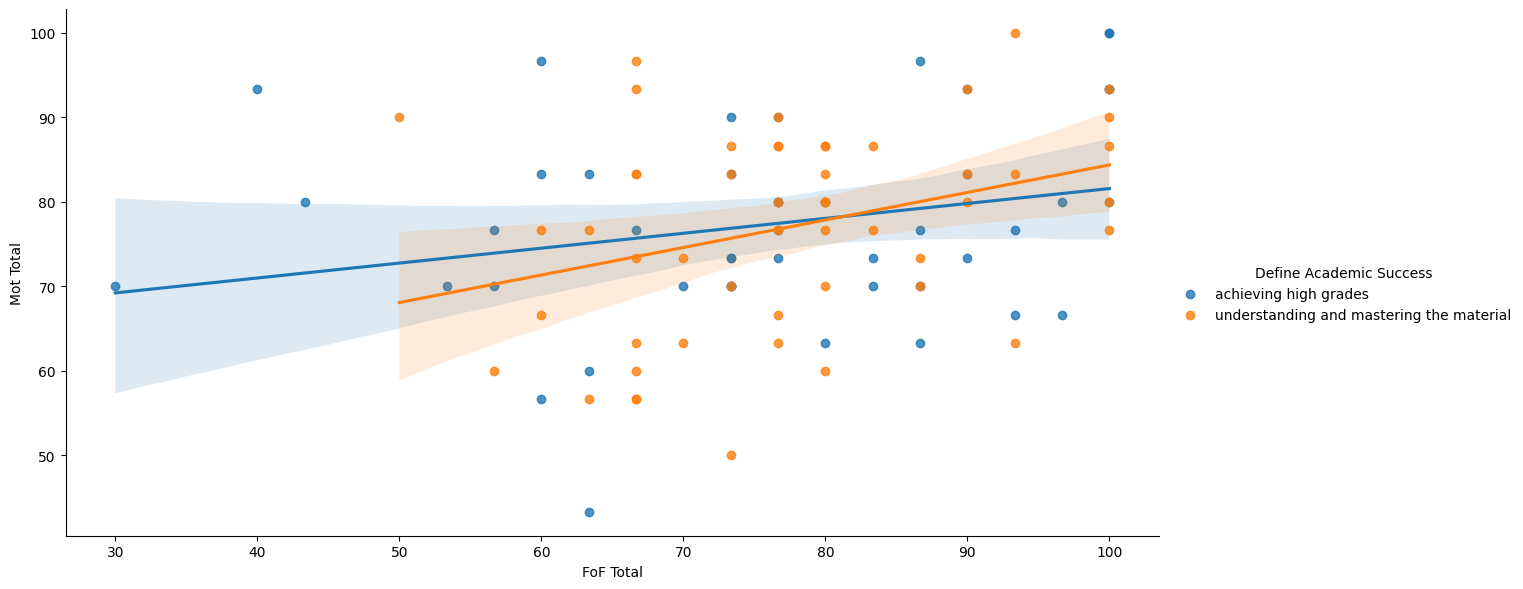

In [14]:
sns.lmplot(x='FoF Total', y='Mot Total', data=df, fit_reg=True, height=6, aspect=2, hue = "Define Academic Success");

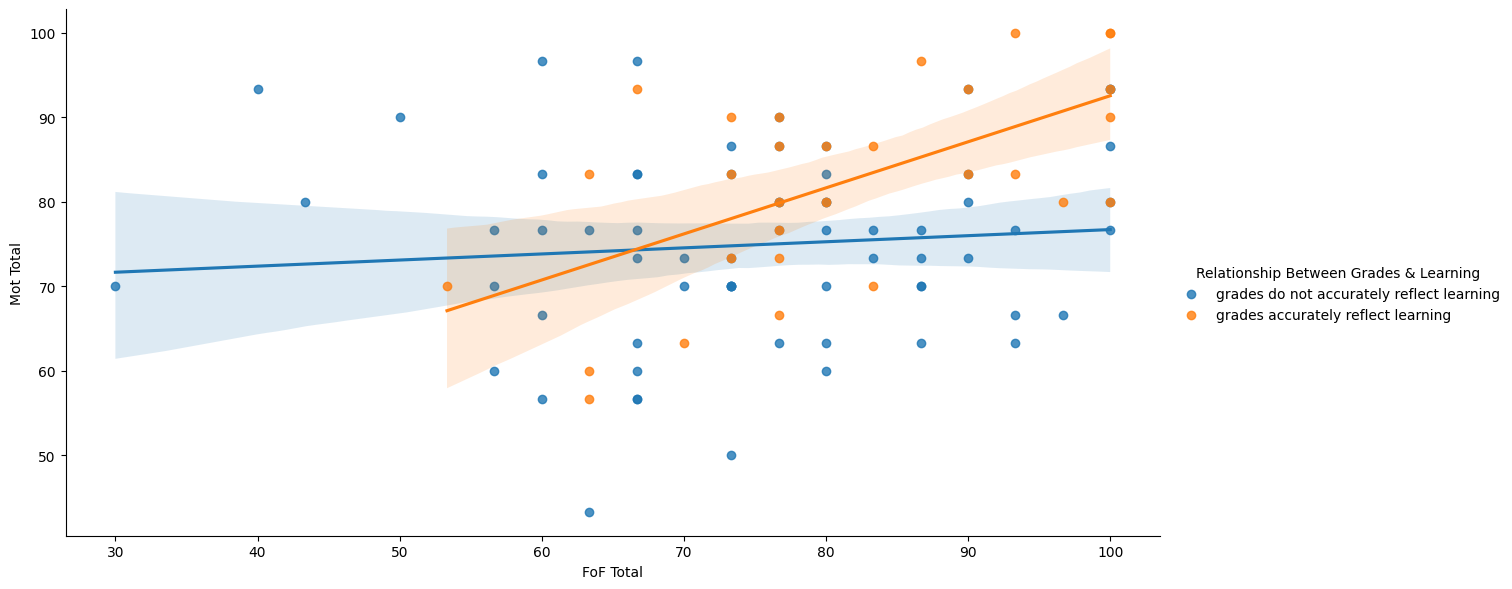

In [15]:
sns.lmplot(x='FoF Total', y='Mot Total', data=df, fit_reg=True, height=6, aspect=2, hue = "Relationship Between Grades & Learning");

In [43]:
foftotal = df["FoF Total"]
mottotal = df["Mot Total"]

In [44]:
correlation_coefficient, p_value = pearsonr(df['FoF Total'],df['Mot Total'] )

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)
print("p_value:", p_value)

Correlation coefficient: 0.28217833113117535
p_value: 0.005106283463202549


In [47]:
model = smf.ols(formula = 'mottotal~foftotal',data = df)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               mottotal   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     8.219
Date:                Mon, 11 Mar 2024   Prob (F-statistic):            0.00511
Time:                        17:57:55   Log-Likelihood:                -373.09
No. Observations:                  97   AIC:                             750.2
Df Residuals:                      95   BIC:                             755.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.4605      6.302      9.436      0.0

In [18]:
correlation_coefficient, p_value = pearsonr(df['FoF Total'],df['Dropping a Class'] )

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)
print("p_value:", p_value)

Correlation coefficient: 0.1895452321147455
p_value: 0.06295655382874227


In [49]:
droppingaclass = df['Dropping a Class']
model = smf.ols(formula = 'droppingaclass~foftotal',data = df)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         droppingaclass   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.540
Date:                Mon, 11 Mar 2024   Prob (F-statistic):             0.0630
Time:                        18:01:22   Log-Likelihood:                -162.51
No. Observations:                  97   AIC:                             329.0
Df Residuals:                      95   BIC:                             334.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8459      0.719      2.568      0.0

In [19]:
correlation_coefficient, p_value = pearsonr(df['FoF Total'],df['Avoid Studying'] )

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)
print("p_value:", p_value)

Correlation coefficient: 0.018393899967870855
p_value: 0.8580746935482364


In [50]:
avoidstudying = df['Avoid Studying']
model = smf.ols(formula = 'avoidstudying~foftotal',data = df)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          avoidstudying   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.03215
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.858
Time:                        18:02:35   Log-Likelihood:                -154.63
No. Observations:                  97   AIC:                             313.3
Df Residuals:                      95   BIC:                             318.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9966      0.663      3.013      0.0

In [21]:
correlation_coefficient, p_value = pearsonr(df['FoF Total'],df['Cheating'] )

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)
print("p_value:", p_value)

Correlation coefficient: 0.05917150950791349
p_value: 0.5648032786946015


In [51]:
cheating = df['Cheating']
model = smf.ols(formula = 'cheating~foftotal',data = df)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               cheating   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3338
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.565
Time:                        18:03:24   Log-Likelihood:                -171.22
No. Observations:                  97   AIC:                             346.4
Df Residuals:                      95   BIC:                             351.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8112      0.786      3.575      0.0

In [22]:
correlation_coefficient, p_value = pearsonr(df['FoF Total'],df['Avoiding challenges'] )

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)
print("p_value:", p_value)

Correlation coefficient: 0.08530141612907055
p_value: 0.406117081816332


In [52]:
avoidchall = df['Avoiding challenges']
model = smf.ols(formula = 'avoidchall~foftotal',data = df)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             avoidchall   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6963
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.406
Time:                        18:04:18   Log-Likelihood:                -161.12
No. Observations:                  97   AIC:                             326.2
Df Residuals:                      95   BIC:                             331.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1611      0.709      3.050      0.0

In [23]:
correlation_coefficient, p_value = pearsonr(df['Mot Total'],df['Actively Seek Feedback'] )

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)
print("p_value:", p_value)

Correlation coefficient: 0.27079204768086523
p_value: 0.007302225941954524


In [54]:
seekfeed = df['Actively Seek Feedback']
model = smf.ols(formula = 'seekfeed~mottotal',data = df)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               seekfeed   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     7.517
Date:                Mon, 11 Mar 2024   Prob (F-statistic):            0.00730
Time:                        18:05:18   Log-Likelihood:                -148.16
No. Observations:                  97   AIC:                             300.3
Df Residuals:                      95   BIC:                             305.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4034      0.756      1.855      0.0

In [58]:
filtered_values = df[df['Define Academic Success'] == 'achieving high grades']
filtered_values.head(8)

,Timestamp,Rate FF,Goals anxiety,FF-High Stakes,FF-Future plans,Self-Value,Outcome Control,FoF Total,Rate AM,Intrinsic Motivation,...,"Learning Content 1st Priority if FF for P/NP Class, GPA N/A",Would Seek Help Due to FF,Would Persist if FF,Actively Seek Feedback,Perception of Academia if Failure Not Possible,Motivation to Learn Master Course Content if Failure Not Possible,Relationship Between Grades & Learning,Define Academic Success,How High Potential for Failure Affects Personal Interest,How High Stakes Class Affects Priorities
0,3/6/2024 20:19:19,1,2,2,1,1,2,30.000000,4,4,...,3.0,3,4,3,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
1,2/29/2024 19:03:31,3,2,4,2,2,4,56.666667,4,3,...,3.0,4,5,3,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
5,2/29/2024 11:00:41,4,5,3,1,4,3,66.666667,4,4,...,5.0,2,4,4,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
9,3/1/2024 18:22:38,4,4,4,4,4,4,80.000000,4,4,...,4.0,4,4,4,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Learning would be my top priority.
13,3/6/2024 20:37:05,4,4,5,5,4,1,76.666667,3,3,...,1.0,3,4,4,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
18,2/29/2024 10:34:16,3,5,4,2,4,4,73.333333,4,5,...,2.0,2,3,2,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
19,2/29/2024 10:36:10,5,5,5,2,4,4,83.333333,4,3,...,1.0,2,1,2,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades accurately reflect learning,achieving high grades,I would be less motivated to learn if I could ...,Getting a good grade/ passing the class would ...
21,2/29/2024 11:23:38,5,4,5,2,3,5,80.000000,4,3,...,5.0,3,3,2,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...


In [59]:
correlation_coefficient, p_value = pearsonr(filtered_values['FoF Total'],filtered_values['Mot Total'] )

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)
print("p_value:", p_value)

Correlation coefficient: 0.24875901033933215
p_value: 0.09550366363659557


In [60]:
fof = filtered_values['FoF Total']
mot = filtered_values['Mot Total']

model = smf.ols(formula = 'mot~fof', data = filtered_values)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mot   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.902
Date:                Mon, 11 Mar 2024   Prob (F-statistic):             0.0955
Time:                        18:09:21   Log-Likelihood:                -177.23
No. Observations:                  46   AIC:                             358.5
Df Residuals:                      44   BIC:                             362.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.9444      8.078      7.916      0.0

In [64]:
filtered_values = df[df['Define Academic Success'] == 'understanding and mastering the material']
filtered_values.head(8)

,Timestamp,Rate FF,Goals anxiety,FF-High Stakes,FF-Future plans,Self-Value,Outcome Control,FoF Total,Rate AM,Intrinsic Motivation,...,"Learning Content 1st Priority if FF for P/NP Class, GPA N/A",Would Seek Help Due to FF,Would Persist if FF,Actively Seek Feedback,Perception of Academia if Failure Not Possible,Motivation to Learn Master Course Content if Failure Not Possible,Relationship Between Grades & Learning,Define Academic Success,How High Potential for Failure Affects Personal Interest,How High Stakes Class Affects Priorities
2,3/2/2024 15:45:12,4,4,4,4,4,4,80.000000,3,3,...,3.0,3,3,3,I would not be willing to take risks and explo...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Learning would be my top priority.
3,3/2/2024 21:44:03,5,5,5,5,3,5,93.333333,5,4,...,4.0,5,5,5,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Learning would be my top priority.
4,3/6/2024 13:28:41,4,4,4,5,4,3,80.000000,5,4,...,2.0,4,4,3,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Getting a good grade/ passing the class would ...
6,2/29/2024 18:48:28,5,3,3,5,4,4,80.000000,3,4,...,4.0,3,4,4,I would not be willing to take risks and explo...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
7,2/29/2024 23:47:48,5,5,5,5,5,5,100.000000,5,5,...,4.0,4,3,3,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Learning would be my top priority.
8,3/1/2024 15:01:40,4,4,4,5,3,4,80.000000,5,4,...,4.0,4,4,4,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Learning would be my top priority.
10,3/3/2024 19:10:57,3,3,3,4,3,3,63.333333,3,3,...,2.0,3,3,3,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Getting a good grade/ passing the class would ...
11,3/3/2024 23:14:04,5,5,5,3,3,2,76.666667,5,5,...,3.0,5,4,2,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Learning would be my top priority.


In [62]:
correlation_coefficient, p_value = pearsonr(filtered_values['FoF Total'],filtered_values['Mot Total'] )

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)
print("p_value:", p_value)

Correlation coefficient: 0.3333824147374297
p_value: 0.01681918059338702


In [65]:
fof = filtered_values['FoF Total']
mot = filtered_values['Mot Total']

model = smf.ols(formula = 'mot~fof', data = filtered_values)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mot   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     6.127
Date:                Mon, 11 Mar 2024   Prob (F-statistic):             0.0168
Time:                        18:10:28   Log-Likelihood:                -195.40
No. Observations:                  51   AIC:                             394.8
Df Residuals:                      49   BIC:                             398.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8059     10.326      5.017      0.0

In [66]:
filtered_values = df[df['Relationship Between Grades & Learning'] == 'grades do not accurately reflect learning']
filtered_values.head(8)

,Timestamp,Rate FF,Goals anxiety,FF-High Stakes,FF-Future plans,Self-Value,Outcome Control,FoF Total,Rate AM,Intrinsic Motivation,...,"Learning Content 1st Priority if FF for P/NP Class, GPA N/A",Would Seek Help Due to FF,Would Persist if FF,Actively Seek Feedback,Perception of Academia if Failure Not Possible,Motivation to Learn Master Course Content if Failure Not Possible,Relationship Between Grades & Learning,Define Academic Success,How High Potential for Failure Affects Personal Interest,How High Stakes Class Affects Priorities
0,3/6/2024 20:19:19,1,2,2,1,1,2,30.000000,4,4,...,3.0,3,4,3,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
1,2/29/2024 19:03:31,3,2,4,2,2,4,56.666667,4,3,...,3.0,4,5,3,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
2,3/2/2024 15:45:12,4,4,4,4,4,4,80.000000,3,3,...,3.0,3,3,3,I would not be willing to take risks and explo...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Learning would be my top priority.
4,3/6/2024 13:28:41,4,4,4,5,4,3,80.000000,5,4,...,2.0,4,4,3,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Getting a good grade/ passing the class would ...
5,2/29/2024 11:00:41,4,5,3,1,4,3,66.666667,4,4,...,5.0,2,4,4,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
6,2/29/2024 18:48:28,5,3,3,5,4,4,80.000000,3,4,...,4.0,3,4,4,I would not be willing to take risks and explo...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
7,2/29/2024 23:47:48,5,5,5,5,5,5,100.000000,5,5,...,4.0,4,3,3,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Learning would be my top priority.
8,3/1/2024 15:01:40,4,4,4,5,3,4,80.000000,5,4,...,4.0,4,4,4,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades do not accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Learning would be my top priority.


In [67]:
correlation_coefficient, p_value = pearsonr(filtered_values['FoF Total'],filtered_values['Mot Total'] )

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)
print("p_value:", p_value)

Correlation coefficient: 0.09502074827874445
p_value: 0.4443463533699988


In [68]:
fof = filtered_values['FoF Total']
mot = filtered_values['Mot Total']

model = smf.ols(formula = 'mot~fof', data = filtered_values)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mot   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5922
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.444
Time:                        18:10:44   Log-Likelihood:                -256.47
No. Observations:                  67   AIC:                             516.9
Df Residuals:                      65   BIC:                             521.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.5184      7.160      9.709      0.0

In [69]:
filtered_values = df[df['Relationship Between Grades & Learning'] == 'grades accurately reflect learning']
filtered_values.head(8)

,Timestamp,Rate FF,Goals anxiety,FF-High Stakes,FF-Future plans,Self-Value,Outcome Control,FoF Total,Rate AM,Intrinsic Motivation,...,"Learning Content 1st Priority if FF for P/NP Class, GPA N/A",Would Seek Help Due to FF,Would Persist if FF,Actively Seek Feedback,Perception of Academia if Failure Not Possible,Motivation to Learn Master Course Content if Failure Not Possible,Relationship Between Grades & Learning,Define Academic Success,How High Potential for Failure Affects Personal Interest,How High Stakes Class Affects Priorities
3,3/2/2024 21:44:03,5,5,5,5,3,5,93.333333,5,4,...,4.0,5,5,5,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Learning would be my top priority.
9,3/1/2024 18:22:38,4,4,4,4,4,4,80.000000,4,4,...,4.0,4,4,4,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades accurately reflect learning,achieving high grades,I would still feel motivated to learn when I a...,Learning would be my top priority.
10,3/3/2024 19:10:57,3,3,3,4,3,3,63.333333,3,3,...,2.0,3,3,3,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades accurately reflect learning,understanding and mastering the material,I would be less motivated to learn if I could ...,Getting a good grade/ passing the class would ...
11,3/3/2024 23:14:04,5,5,5,3,3,2,76.666667,5,5,...,3.0,5,4,2,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Learning would be my top priority.
14,2/29/2024 10:20:04,5,5,3,1,4,4,73.333333,5,4,...,4.0,2,4,3,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...
15,2/29/2024 10:24:09,5,5,2,1,5,5,76.666667,5,4,...,5.0,3,5,4,I would be willing to take risks and explore n...,I would feel less motivated to learn,grades accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Learning would be my top priority.
19,2/29/2024 10:36:10,5,5,5,2,4,4,83.333333,4,3,...,1.0,2,1,2,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades accurately reflect learning,achieving high grades,I would be less motivated to learn if I could ...,Getting a good grade/ passing the class would ...
20,2/29/2024 11:03:54,5,5,4,1,4,1,66.666667,5,4,...,4.0,5,4,4,I would be willing to take risks and explore n...,I would feel more motivated to learn,grades accurately reflect learning,understanding and mastering the material,I would still feel motivated to learn when I a...,Getting a good grade/ passing the class would ...


In [70]:
correlation_coefficient, p_value = pearsonr(filtered_values['FoF Total'],filtered_values['Mot Total'] )

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)
print("p_value:", p_value)

Correlation coefficient: 0.6000573505824358
p_value: 0.0004563304426742729


In [71]:
fof = filtered_values['FoF Total']
mot = filtered_values['Mot Total']

model = smf.ols(formula = 'mot~fof', data = filtered_values)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mot   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     15.75
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           0.000456
Time:                        18:10:59   Log-Likelihood:                -109.36
No. Observations:                  30   AIC:                             222.7
Df Residuals:                      28   BIC:                             225.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.0555     11.292      3.370      0.0